### Challenge: Iterate and evaluate your classifier
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. 

Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- Which features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Process the amazon datafile:
data_amz = pd.read_csv('U2-sentiment labelled sentences\\sentiment labelled sentences\\amazon_cells_labelled.txt'
                       ,delimiter='\t',header=None)
# Sentiment: 1 (for positive) or 0 (for negative)
data_amz.columns = ['Comment','Sentiment']
data_amz.head(10)

,Comment,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [112]:
data_amz.shape

(1000, 2)

In [14]:
data_amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Comment      1000 non-null object
Sentiment    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [113]:
pd.crosstab('Count',data_amz['Sentiment'])

Sentiment,0,1
row_0,,
Count,500,500


In [26]:
pd.pivot_table(data_amz, columns=['Sentiment'],aggfunc=np.sum)

Sentiment,0,1
Comment,So there is no way for me to plug it in here i...,"Good case, Excellent value.Great for the jawbo..."


In [27]:
data_amz.groupby(['Sentiment']).agg(['count'])

,Comment
,count
Sentiment,
0,500
1,500


In [28]:
data_amz['Sentiment'].value_counts()

1    500
0    500
Name: Sentiment, dtype: int64

In [3]:
# Display full text in Comment column to be able to check what kind of keywords I can find:
pd.set_option('display.max_colwidth', -1)
data_amz[data_amz['Sentiment']==0].iloc[0:30]

,Comment,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0
12,If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.,0
14,"The design is very odd, as the ear ""clip"" is not very comfortable at all.",0
16,I advise EVERYONE DO NOT BE FOOLED!,0
19,It clicks into place in a way that makes you wonder how long that mechanism would last.,0


### Build a list of single words or multiple words for negative sentiment:

In [25]:
keywords1 = ['no way','problem','problems','waste','wasted'           
           ]

keywords2 = ['no way','problem','problems','waste','wasted'
            #,'is not','could not','does not'
            ,'unusable'
            ,'doesn\'t','disappointed','bad' #455 mislabeled 
            
           ]

keywords3 = ['no way','problem','problems','waste','wasted'
            #,'is not','could not','does not'
            ,'unusable'
            ,'doesn\'t','disappointed','bad' #455 mislabeled 
            ,'not'#397 mislabeled
            
           ]

keywords4  = ['no way','problem','problems','waste','wasted'
            #,'is not','could not','does not'
            ,'unusable'
            ,'doesn\'t','disappointed','bad' #455 mislabeled 
            ,'not'#397 mislabeled
            ,'horrible'#395 mislabeled
         
           ]

In [90]:
# The best list  so far:
keywords = ['no way','problem','problems','waste','wasted'
            #,'is not','could not','does not'
            ,'unusable'
            ,'doesn\'t','disappointed','bad' #455 mislabeled 
            ,'not'#397 mislabeled
            ,'horrible'#395 mislabeled
            ,'poor','unacceptable','below','unhappy'#333 mislabeled
            ,'mistake','don\'t','didn\'t','junk' , 'wouldn\'t' , 'back' ,'worst','sucks','hate','dead','breaks','stupid'
           ]

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    # I included a 'lower caps' method to get more checks...it seems that id did not have any effect!
    data_amz[str(key)] = data_amz['Comment'].str.lower().str.contains(
        str(key),
        case=False
    )
    
data_amz['allcaps'] = data_amz['Comment'].str.isupper()    

In [5]:
# Check how the previous conditions were applied:
# Create a new column with Comments in lower cases 
data_amz['CommentLower'] = data_amz['Comment'].str.lower()
data_amz[data_amz['CommentLower'].str.contains('doesn\'t')]

,Comment,Sentiment,no way,problem,problems,waste,wasted,unusable,doesn't,disappointed,bad,not,horrible,poor,unacceptable,below,unhappy,allcaps,CommentLower
29,Doesn't hold charge.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,doesn't hold charge.
50,Not loud enough and doesn't turn on like it should.,0,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,not loud enough and doesn't turn on like it should.
70,Mic Doesn't work.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,mic doesn't work.
166,Doesn't work at all.. I bougth it for my L7c and its not working.,0,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,doesn't work at all.. i bougth it for my l7c and its not working.
168,doesn't last long.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,doesn't last long.
198,The pleather case doesn't fit.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,the pleather case doesn't fit.
226,I usually don't like headbands but this one is very lightweight & doesn't mess up my hair.,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,i usually don't like headbands but this one is very lightweight & doesn't mess up my hair.
282,"First of all, it doesn't wear well.",0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,"first of all, it doesn't wear well."
610,It doesn't work in Europe or Asia.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,it doesn't work in europe or asia.
697,It doesn't make you look cool.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,it doesn't make you look cool.


In [91]:
# 1 = good = True / 0 = bad = False
data_amz['Sentiment'] = (data_amz['Sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't!!!

### Correlation graph:
* One of the main assumptions of Naive Bayes is that the variables fed into the model are independent of each other. Let's check to see how true that is in this case using Pandas' built in correlation matrix function, corr(), and the heatmap from seaborn:

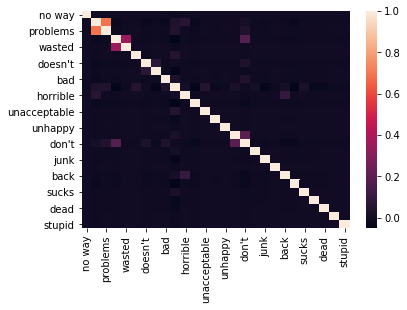

In [92]:
sns.heatmap(data_amz[keywords].corr())
plt.show()

SKLearn required you to specify an outcome (y or dependent variable) and your inputs (x or independent variables). 

We'll do that below under the titles data and target.

In [93]:
data = data_amz[keywords+ ['allcaps']]
target = data_amz['Sentiment']

In [94]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 277


In [122]:
type(y_pred)

numpy.ndarray

In [123]:
y_pred[:15]

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False])

In [221]:
data_amz.loc[data_amz['Sentiment']==True].head()

,Comment,Sentiment,no way,problem,problems,waste,wasted,unusable,doesn't,disappointed,bad,not,horrible,poor,unacceptable,allcaps,CommentLower
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"good case, excellent value."
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,great for the jawbone.
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,the mic is great.
7,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,if you are razr owner...you must have this!
10,And the sound quality is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,and the sound quality is great.


In [87]:
# Show wich comments were predicted incorrectly:
a = data_amz[['Comment','Sentiment']]
a = a.assign(y_pred=y_pred)
a.loc[a['Sentiment']!=a['y_pred']][30:100]

,Comment,Sentiment,y_pred
138,In my house I was getting dropped coverage upstairs and no coverage in my basement.,False,True
141,"During several different 2 minute calls, I experienced 5 drops and it was in an area that had 5 bars.",False,True
144,The phone takes FOREVER to charge like 2 to 5 hours literally.,False,True
149,"After 3 months, screen just went black all of a sudden.",False,True
150,I Was Hoping for More.,False,True
154,I've bought $5 wired headphones that sound better than these.,False,True
160,"All I can do is whine on the Internet, so here it goes.The more I use the thing the less I like it.",False,True
170,EXCELLENT SERVICE!!!!!!!!.,True,False
171,Thank you for wasting my money.,False,True
177,"I put the latest OS on it (v1.15g), and it now likes to slow to a crawl and lock up every once in a while.",False,True


### Success Rate
Calculate the <b><u>accuracy</u></b> of your model here.

In [95]:
t = (target != y_pred).sum()
s = data_amz.shape[0]

success_rate = (1-t/s)*100
print('success_rate = ',success_rate,'%')

success_rate =  72.3 %


### Confusion Matrix
The next level of analysis of your classifier is often something called a Confusion Matrix. This is a matrix that shows the count of each possible permutation of target and prediction. So in our case, it will show the counts for when a message was ham and we predicted ham, when a message was ham and we predicted spam, when a message was spam and we predicted ham, and when a message was spam and we predicted spam.

SKLearn has a built in confusion matrix function, so let's quickly import that and generate one here.

### Here the [ Columns are <u>prediction</u> ] and the [ Rows are <u>actual</u> ].

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[254, 246],
       [ 31, 469]], dtype=int64)

Assuming that 246 = FP and 31 = FN:

246 out of 333(=308+25)) were predicted like Good(positive comment) but were actually bad.

31 out 333 were predicted Negative(0) comments which were actually Good(1)

In [97]:
# Convert y_pred to dataframe to count values
df_y_pred = pd.DataFrame(y_pred,columns=['y_pred'])
df_y_pred['y_pred'].value_counts()

True     715
False    285
Name: y_pred, dtype: int64

### Sensitivity: is the percentage of positives correctly identified
This shows how good we are at catching positives, or how sensitive our model is to identifying positives.

= 469/500 = 94%

### Specificity: is just the opposite, the percentage of negatives correctly identified

= 192 / 500 = 50.8%

In [31]:
data_amz1 = data_amz
data_amz2 = data_amz
data_amz3 = data_amz
data_amz4 = data_amz

for key in keywords1:
    data_amz1[str(key)] = data_amz1['Comment'].str.lower().str.contains(
        str(key),
        case=False
    )    
data_amz1['allcaps'] = data_amz1['Comment'].str.isupper()    

for key in keywords2:
    data_amz2[str(key)] = data_amz2['Comment'].str.lower().str.contains(
        str(key),
        case=False
    )    
data_amz2['allcaps'] = data_amz2['Comment'].str.isupper() 

for key in keywords3:
    data_amz3[str(key)] = data_amz3['Comment'].str.lower().str.contains(
        str(key),
        case=False
    )    
data_amz3['allcaps'] = data_amz3['Comment'].str.isupper() 

for key in keywords4:
    data_amz4[str(key)] = data_amz4['Comment'].str.lower().str.contains(
        str(key),
        case=False
    )    
data_amz4['allcaps'] = data_amz4['Comment'].str.isupper() 

data1 = data_amz1[keywords1+ ['allcaps']]
target1 = data_amz1['Sentiment']

data2 = data_amz2[keywords2+ ['allcaps']]
target2 = data_amz2['Sentiment']

data3 = data_amz3[keywords3+ ['allcaps']]
target3 = data_amz3['Sentiment']

data4 = data_amz4[keywords+ ['allcaps']]
target4 = data_amz4['Sentiment']

bnb1 = BernoulliNB()
bnb2 = BernoulliNB()
bnb3 = BernoulliNB()
bnb4 = BernoulliNB()

# Fit our model to the data.
y_pred1 = bnb1.fit(data1, target1).predict(data1)
y_pred2 = bnb2.fit(data2, target2).predict(data2)
y_pred3 = bnb3.fit(data3, target3).predict(data3)
y_pred4 = bnb4.fit(data4, target4).predict(data4)


# Display our results.
print("1>>Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != y_pred1).sum()
))
# Display our results.
print("2>>Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))
# Display our results.
print("3>>Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))
# Display our results.
print("4>>Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))

1>>Number of mislabeled points out of a total 1000 points : 473
2>>Number of mislabeled points out of a total 1000 points : 437
3>>Number of mislabeled points out of a total 1000 points : 357
4>>Number of mislabeled points out of a total 1000 points : 333


As we add more words in the list, the level of misalbeled points decreases.

### test the classifier on one of the other datasets to see how well these kinds of classifiers translate from one context to another: IMDB

In [72]:
# Process the IMDB datafile:
data_imdb = pd.read_csv('U2-sentiment labelled sentences\\sentiment labelled sentences\\imdb_labelled.txt'
                       ,delimiter='\t',header=None)
# Sentiment: 1 (for positive) or 0 (for negative)
data_imdb.columns = ['Comment','Sentiment']
data_imdb.head(10)

,Comment,Sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0
6,Wasted two hours.,0
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the science teacher.,1


In [98]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    # I included a 'lower caps' method to get more checks...it seems that id did not have any effect!
    data_imdb[str(key)] = data_imdb['Comment'].str.lower().str.contains(
        str(key),
        case=False
    )
    
data_imdb['allcaps'] = data_imdb['Comment'].str.isupper() 

In [263]:
data_imdb['Sentiment'].value_counts()

1    386
0    362
Name: Sentiment, dtype: int64

In [99]:
data_i = data_imdb[keywords+ ['allcaps']]
target_i = data_imdb['Sentiment']

In [100]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_i, target_i)

# Classify, storing the result in a new variable.
y_pred_i = bnb.predict(data_i)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_i.shape[0],
    (target_i != y_pred_i).sum()
))

Number of mislabeled points out of a total 748 points : 245


In [101]:
confusion_matrix(target_i, y_pred_i)

array([[146, 216],
       [ 29, 357]], dtype=int64)

<b>Sensitivity</b>: is the percentage of positives correctly identified

= 357 / 386 = 92.5%

# OVERFITTING:
Overfitting is when your model is so excessively complex that it starts to catch random noise instead of describing the true underlying relationships. 

### Holdout Groups
The simplest way to combat overfitting is with a <b>holdout group</b> (or sometimes "holdback group"). All this means is that you do not include all of your data in your training set, instead reserving some of it exclusively for testing. While there is a cost to having less training data, your evaluation will be far more reliable.

    * You should check and see how much variance your model has as you add more data, as well as
    * how much data it would take to maintain a reasonably representative test sample.

In [102]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.75
Testing on Sample: 0.723


These scores look really consistent! It doesn't seem like our model is overfitting. Part of the reason for that is that it's so simple. But we should look and see if any other issues are lurking here. So let's try a more robust evaluation technique, cross validation.

In [79]:
# Display each group:
print('X_train =',X_train.shape)
print('X_test =',X_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

X_train = (800, 24)
X_test = (200, 24)
y_train = (800,)
y_test = (200,)


## Cross Validation >>>>
Cross validation is a more robust version of holdout groups. Instead of creating just one holdout, you create several.

The way it works is this: start by breaking up your data into several equally sized pieces, or folds. Let's say you make `x` folds. You then go through the training and testing process `x` times, each time with a different fold held out from the training data and used as the test set. 

The number of folds you create is up to you, but it will depend on how much data you want in your testing set.

In [103]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.72, 0.75, 0.78, 0.77, 0.76, 0.63, 0.67, 0.62, 0.75, 0.71])

The array that cross_val_score returns is a series of <b>accuracy scores</b> with a different hold out group each time. If our model is overfitting at a variable amount, those scores will fluctuate. 

There is some fluctuation...

It seemn that when we introduced the word "not" or "doesn't" the number of misslabeled droped.

### How good are the first groups where the number of words in the list were fewer:

In [104]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1, target1, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb1.fit(X_train1, y_train1).score(X_test1, y_test1)))
print('Testing on Sample: ' + str(bnb1.fit(data1, target1).score(data1, target1)))

With 20% Holdout: 0.56
Testing on Sample: 0.527


In [33]:
cross_val_score(bnb1, data1, target1, cv=10)

array([0.56, 0.51, 0.56, 0.55, 0.52, 0.46, 0.51, 0.52, 0.53, 0.52])

### ... less performant.